In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=250)
%matplotlib inline

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [5]:
font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# Random Forest is Not a Well-Calibrated Classifier

Using a minimum amount of code, this notebook demonstrates that the scikit-learn implementation of Random Forest is not calibrated, while logistic regression is.

## Create some classification test data

In [20]:
X, y = make_classification(n_samples=30000, n_features=3, n_informative=3, n_redundant=0, random_state=0, shuffle=False)

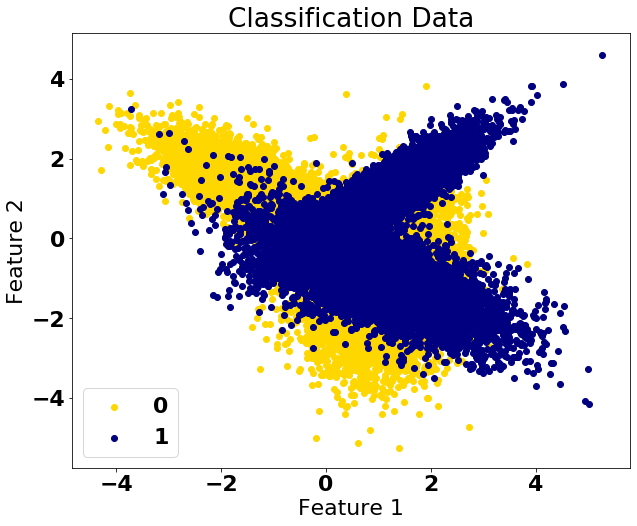

In [52]:
cdict = {0: 'gold', 1: 'navy'}
fig, ax = plt.subplots(figsize=(10,8))
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(X[ix, 1], X[ix, 2], c = cdict[g], label = g)
ax.legend()
plt.xlabel('Feature 1');
plt.ylabel('Feature 2');
plt.title('Classification Data')
plt.show()

## Train Random Forest and Logistic Classifiers

In [24]:
## Split the data into train and test sets. (Not strictly necessary for this example, but good practice regardless.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
## Train a random forest classifier
clf_rf = RandomForestClassifier(max_depth=3, random_state=0, min_samples_leaf=3).fit(X_train, y_train)
predictions_rf = clf_rf.predict_proba(X_test)

In [26]:
## Train a logistic classifier
clf_log = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions_log = clf_log.predict_proba(X_test)

## Compare the probability predictions

In [27]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [28]:
## Here we are binning the predictions from the random forest prediction 
## and then looking at the percentage of each bin that is assigned to the positive class
predictions_df = pd.DataFrame(predictions_rf)
predictions_df['actual'] = y_test
predictions_df['bin'] = pd.cut(predictions_df[1], bins)
predictions_df['bin_mid'] = predictions_df['bin'].apply(lambda x: x.mid).astype(float)
bin_df = predictions_df.groupby('bin_mid').actual.mean().reset_index()

In [29]:
## Here we are binning the predictions from the logistic prediction 
## and then looking at the percentage of each bin that is assigned to the positive class
predictions_log_df = pd.DataFrame(predictions_log)
predictions_log_df['actual'] = y_test
predictions_log_df['bin'] = pd.cut(predictions_log_df[1], bins)
predictions_log_df['bin_mid'] = predictions_log_df['bin'].apply(lambda x: x.mid).astype(float)
bin_log_df = predictions_log_df.groupby('bin_mid').actual.mean().reset_index()

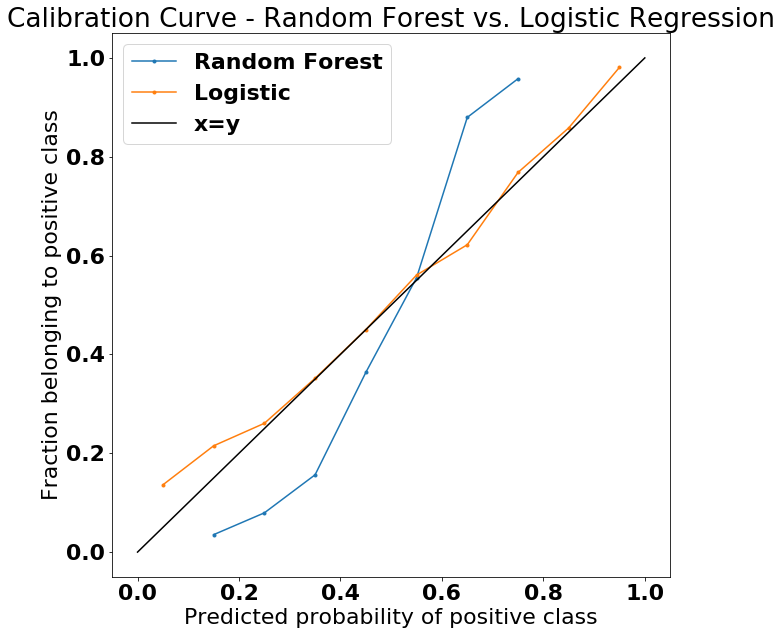

In [54]:
## Finally, plot the binned predictions for both logistic regression and random forest
plt.figure(figsize=(10,10))
plt.plot(bin_df.bin_mid, bin_df.actual, '.-');
plt.plot(bin_log_df.bin_mid, bin_log_df.actual, '.-');
plt.plot([0,1], [0,1], 'k')
plt.legend(['Random Forest', 'Logistic', 'x=y']);
plt.xlabel('Predicted probability of positive class');
plt.ylabel('Fraction belonging to positive class');
plt.title('Calibration Curve - Random Forest vs. Logistic Regression');